<a href="https://colab.research.google.com/github/biku1998/Damage_Vs_Normal_Vechile_Using_CNN_FastAI/blob/master/scratch_detection_binary_classification_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:
# check if gpu is avaliable or not
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
!tree

Folder PATH listing for volume ROG_2
Volume serial number is 828A-1260
E:.
ÃÄÄÄmodels
ÃÄÄÄtraining
³   ÃÄÄÄdamage
³   ÀÄÄÄwhole
ÀÄÄÄvalidation
    ÃÄÄÄdamage
    ÀÄÄÄwhole


In [0]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_validation = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [0]:
folders = ['training','validation']
classes = ['damage','whole']
transforms_list = [transform_train,transform_validation]

In [0]:
dataset = []
for i,f in enumerate(folders):
        t = torchvision.datasets.ImageFolder(f'./{f}/',transform = transforms_list[i])
        dataset.append(t)

In [0]:
dataset

[Dataset ImageFolder
     Number of datapoints: 1840
     Root location: ./training/
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                RandomRotation(degrees=(-15, 15), resample=False, expand=False)
                ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ), Dataset ImageFolder
     Number of datapoints: 460
     Root location: ./validation/
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            )]

In [0]:
trainset = dataset[0] 
valset = dataset[1]

In [0]:
# just for plotting some data
batch_size = 5
trainloader  = torch.utils.data.DataLoader(trainset,batch_size = batch_size,shuffle=True)

In [0]:
# get first batch i.e 4 image and label and print size
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([5, 3, 224, 224])
torch.Size([5])


In [0]:
# the plotting function.
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(classes[title.item()],fontsize = 16)
    plt.show()

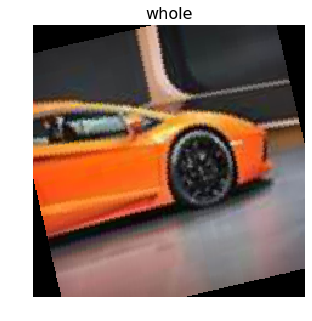

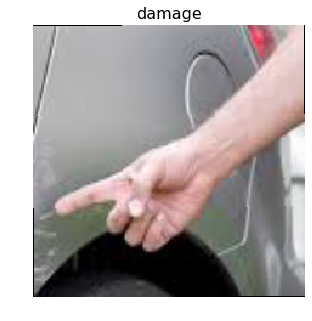

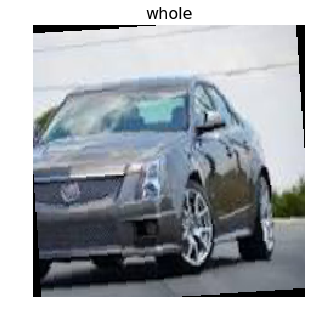

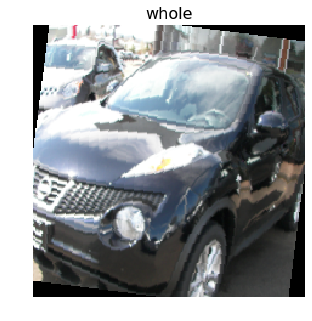

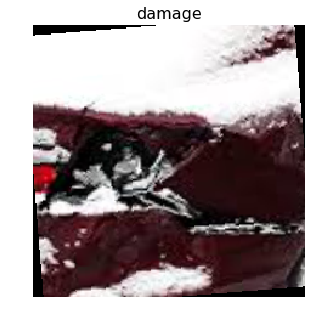

In [0]:
for i,l in zip(images,labels):
    imshow(i,l)

In [0]:
# let's first try a VGG-16 pre-trained model

model = torchvision.models.vgg16_bn(pretrained=True)

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
for param in model.parameters():
    param.requires_grad = False

In [0]:
# no of trainable parameters

for param in model.parameters():
    if param.requires_grad:
        print(param.shape)
# zero

In [0]:
# unfreeze some more param
i = 0
for child in model.children():
    i += 1
    if i == 3:
        for param in child.parameters():
            param.requires_grad = True

In [0]:
final_in_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(final_in_features, len(classes))

In [0]:
# no of trainable parameters

for param in model.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([4096, 25088])
torch.Size([4096])
torch.Size([4096, 4096])
torch.Size([4096])
torch.Size([2, 4096])
torch.Size([2])


In [0]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
batch_size = 64
trainloader  = torch.utils.data.DataLoader(trainset,batch_size = batch_size,shuffle=True)
valloader = torch.utils.data.DataLoader(valset,batch_size = batch_size,shuffle=True)

In [0]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
model = model.to(device) 
loss_fn = nn.CrossEntropyLoss() 
opt = optim.RMSprop(model.parameters(),lr=0.0001,momentum=0.001)

In [0]:
PATH = "./models/model_1_acc_85.pth"

In [0]:
import copy
from datetime import datetime

In [0]:
best_model = None

In [0]:
# let's load the saved model and re-train
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Min loss 0.35
Iteration: 0/782, Loss: 0.35
Min loss 0.35
Min loss 0.22
Min loss 0.19
Epoch: 0/5, Validation acc: 83.26, Train acc: 82.99
Iteration: 0/782, Loss: 0.48
Epoch: 1/5, Validation acc: 89.57, Train acc: 87.28
Iteration: 0/782, Loss: 0.30
Min loss 0.16
Min loss 0.12
Epoch: 2/5, Validation acc: 87.17, Train acc: 87.83
Iteration: 0/782, Loss: 0.30
Epoch: 3/5, Validation acc: 88.26, Train acc: 86.63
Iteration: 0/782, Loss: 0.26
Epoch: 4/5, Validation acc: 89.13, Train acc: 88.26
=== Time elapsed for 5 epochs :0:04:42.762057 ===


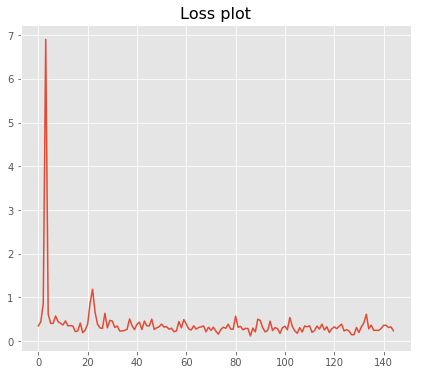

In [0]:
tick  = datetime.now()
loss_epoch_arr = []
max_epochs = 5

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad() # setting gradients to zero.

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item(): 
            min_loss = loss.item() # updating the variable.
            best_model = copy.deepcopy(model.state_dict()) # making a deep copy of the param space.
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

        
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Validation acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(valloader, model), evaluation(trainloader, model)))

tock = datetime.now()
print(f'=== Time elapsed for {max_epochs} epochs :{tock - tick} ===')

plt.style.use('ggplot')
plt.figure(figsize=(7,6))
plt.plot(loss_epoch_arr)
plt.title('Loss plot',fontsize = 16)
plt.show()

* We can see Fluctuation in loss, can be due to high learning rate, small batch size

In [0]:
%%time
model.load_state_dict(best_model)  # over-writing the fully trained model with the best model.
print('Best model metrics')
print(f'Train acc : {evaluation(trainloader, model)}, Validation acc : {evaluation(valloader, model)}')

Best model metrics
Train acc : 88.15217391304348, Validation acc : 89.1304347826087
Wall time: 29.3 s


In [0]:
# Let's save the model, we will load the model and train again.
torch.save(model.state_dict(), PATH)